In [219]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [221]:
ticker = "AAPL"
data = yf.download(ticker, start="1960-01-01", end="2025-04-28")
print(data)

[*********************100%***********************]  1 of 1 completed

Price            Close        High         Low        Open     Volume
Ticker            AAPL        AAPL        AAPL        AAPL       AAPL
Date                                                                 
1980-12-12    0.098726    0.099155    0.098726    0.098726  469033600
1980-12-15    0.093575    0.094005    0.093575    0.094005  175884800
1980-12-16    0.086707    0.087136    0.086707    0.087136  105728000
1980-12-17    0.088853    0.089282    0.088853    0.088853   86441600
1980-12-18    0.091429    0.091858    0.091429    0.091429   73449600
...                ...         ...         ...         ...        ...
2025-04-21  193.160004  193.800003  189.809998  193.270004   46742500
2025-04-22  199.740005  201.589996  195.970001  196.119995   52976400
2025-04-23  204.600006  208.000000  202.800003  206.000000   52929200
2025-04-24  208.369995  208.830002  202.940002  204.889999   47311000
2025-04-25  209.279999  209.750000  206.199997  206.369995   38198600

[11183 rows x 5 col

In [223]:
data = data.reset_index()
data['Days'] = np.arange(len(data))

In [225]:
x = data[['Days']]
y = data['Close']

In [227]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2 )

In [229]:
poly = PolynomialFeatures(degree=5)  
x_poly = poly.fit_transform(x_train)

model = LinearRegression()
model.fit(x_poly, y_train)

LinearRegression()

In [231]:
x_test_poly = poly.transform(x_test)
y_pred = model.predict(x_test_poly)

In [233]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2}")

Mean Squared Error: 61.005430486579336
R2 Score: 0.9758709400357449


In [235]:
sorted_indices = np.argsort(x_test.squeeze().values)  
x_test_sorted = x_test.squeeze().values[sorted_indices]
y_pred_sorted = y_pred.squeeze()[sorted_indices]

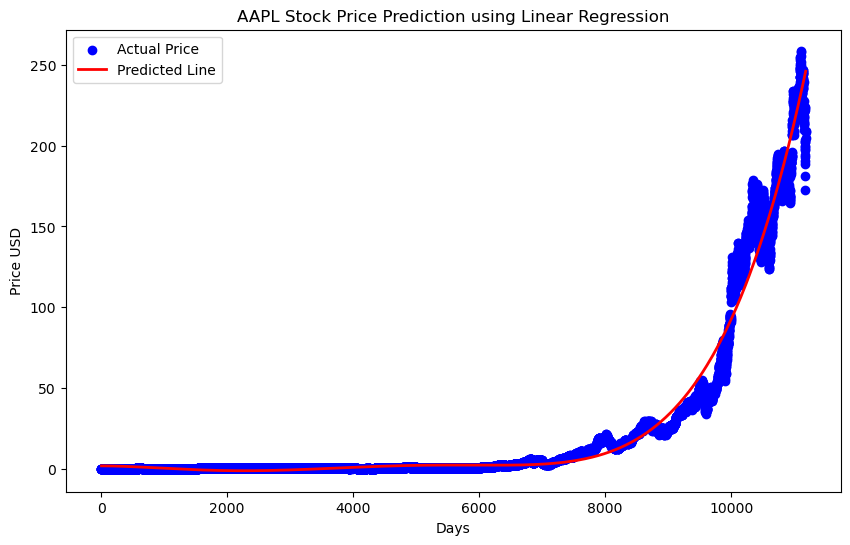

In [237]:
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', label='Actual Price')  # actual points
plt.plot(x_test_sorted, y_pred_sorted, color='red', linewidth=2, label='Predicted Line')  # smooth line
plt.title('AAPL Stock Price Prediction using Linear Regression')
plt.xlabel('Days')
plt.ylabel('Price USD')
plt.legend()
plt.show()